# Import

In [1]:
import shap

In [2]:
import xgboost as xgb

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [3]:
import importlib
import efrc_ml_production as ml
importlib.reload(ml)

<module 'efrc_ml_production' from '/home/rgur/py_scripts/efrc_ml_production.py'>

In [4]:
import pandas as pd

In [5]:
import time

# Write functions

In [6]:
def load_model(model_path):
    reg = xgb.XGBRegressor()
    booster = xgb.Booster()
    booster.load_model(model_path)
    reg._Booster = booster
    return reg

In [7]:
def shap_mat(model, data):
    start = time.time()
    explainer = shap.TreeExplainer(model)
    end = time.time()
    shap_values = explainer.shap_values(data)
    print("Time elapsed to create shap values: %s" %(end-start))
    return shap_values

In [8]:
def get_features(params_path):
    f = open(params_path, 'r')
    start = False
    for line in f:
        #lines.append(line.strip())
        strp = line.strip()
        if start:
            try:
                exec(strp)
            except:
                pass        
        elif 'algo' in strp:
            start = True
            try:
                exec(strp)
            except:
                pass    
    
    RETURN_FEATURES = True
    return ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, total_frac, 
                                        del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                        del_geometric_fp, cat_col_names, Y_DATA_PATH, return_features=RETURN_FEATURES)

In [9]:
def change_names(s):
    d = {'norm_Void_Fraction':'Void Fraction',
    'norm_Surf._Area_(m2/g)':'Surface Area',
    'norm_Density':'Density',
     'Mefp_norm_mol_wt_si':'Norm_mol_wt',
     'Mmfp_MQNs26_si':'Norm_MQNs26',
     'norm_Mmfp_Chi1n': 'Chi1n',
     'norm_Vol._Surf._Area': 'Volumetric Surface Area',
     'oh_1': 'Cat_1',
     'norm_Max._Pore_(ang.)': 'Max Pore Diameter',
     'norm_Dom._Pore_(ang.)': 'Dominant Pore Diameter',
     'norm_atomic_rad_pa_(angstroms)': 'Atomic_rad'
    }
    try:
        return d[s]
    except:
        if s[:5] == 'norm_':
            s = s[5:]
        if s[-3:] == '_si':
            s = 'norm_' + s[:-3]
        if 'Mefp_' in s:
            s = s.replace('Mefp_', '')
        if 'Mmfp_' in s:
            s = s.replace('Mmfp_', '')
        if 'Mafp_' in s:
            s = s.replace('Mafp_', '')
#         if (s[:5] == 'Mefp_' or s[:5] == 'Mmfp_' or s[:5] == 'Mafp_'):
#             s = s[5:]
        if s[-3:] == '_pa':
            s = s[:-3]
        s=s.capitalize()
        return s
        

# Scratch

# SHAP Plots for best all-feature model

In [10]:
model = load_model('/data/rgur/efrc/ml/models/12:05PM_on_April_11_2020/12:05PM_on_April_11_2020.xgb')

In [11]:
params_path = '/data/rgur/efrc/ml/models/12:05PM_on_April_11_2020/params_12:05PM_on_April_11_2020'

In [12]:
f = open(params_path, 'r')
start = False
for line in f:
    #lines.append(line.strip())
    strp = line.strip()
    if start:
        try:
            exec(strp)
        except:
            pass        
    elif 'algo' in strp:
        start = True
        try:
            exec(strp)
        except:
            pass    

RETURN_FEATURES = True
features = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, total_frac, 
                                    del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                    del_geometric_fp, cat_col_names, Y_DATA_PATH, return_features=RETURN_FEATURES)

Columns (4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.


In [13]:
features = [i for i in features if i not in ['norm_Mafp_N2_O2_N3', 'norm_Mmfp_MQNs25', 'norm_Mmfp_MQNs24', 'norm_Mafp_C1_N2_N3', 'norm_Mmfp_MQNs22', 'norm_Mmfp_MQNs23']]

In [15]:
train = pd.read_csv('/data/rgur/efrc/ml/models/12:05PM_on_April_11_2020/train_12:05PM_on_April_11_2020.csv')

In [16]:
test = pd.read_csv('/data/rgur/efrc/ml/models/12:05PM_on_April_11_2020/test_12:05PM_on_April_11_2020.csv')

In [17]:
train_fp = pd.concat([train, test], ignore_index=True)[features].to_numpy()

In [18]:
shap_vals = shap_mat(model, train_fp)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Time elapsed to create shap values: 7.2797627449035645


In [19]:
#save shap_vals
import pickle
with open('/data/rgur/efrc/ml/models/12:05PM_on_April_11_2020/shap_12:05PM_on_April_11_2020.pkl', 'wb') as f:
    pickle.dump(shap_vals, f)

In [20]:
adj_names = [change_names(s) for s in features]

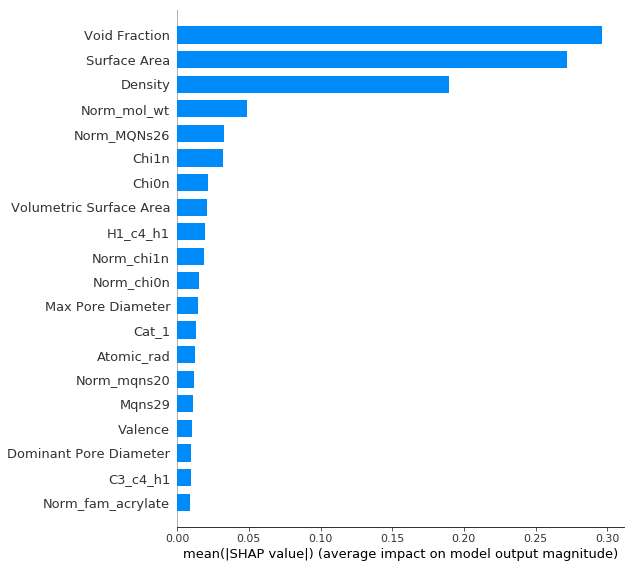

In [21]:
shap.summary_plot(shap_vals, features, feature_names=adj_names, plot_type='bar', show=False)

# Test functions